In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#importing train dataset
df=pd.read_csv('train.csv')
df.shape

(550068, 12)

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
#droping user Id column wise using axis =1 and updating 'df' using inplace=true
df.drop(['User_ID'],axis=1,inplace=True)

In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [15]:
#Data preprocessing [Handling categorical features:Gender]
#df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)

In [16]:
#Using map function we can change f to 0 and M to 1
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
#[Handling categorical features:Age]
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,"26-35":3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [20]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [21]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969,0,1


In [22]:
df=df.drop('City_Category',axis=1)

In [23]:
df.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int64(6), object(2), uint8(2)
memory usage: 43.0+ MB


In [25]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [26]:
#Label encoding
from sklearn import preprocessing
# Label_encoder object knows how to understand word labels .
label_encoder = preprocessing.LabelEncoder ( )
#Encode Labels in column ' Age ' .
df['Stay_In_Current_City_Years'] = label_encoder.fit_transform (df['Stay_In_Current_City_Years'])

In [27]:
#Missing Value Treatmet
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [28]:
#missing value treatment for product category _2
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [29]:
df.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [30]:
df.Product_Category_2.mode()[0]


8.0

In [31]:
#Replacing missing value when data is discrete = Mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df.Product_Category_2.mode()[0])

In [32]:
df.Product_Category_2.isnull().sum()

0

In [33]:
#missing value treatment for product category _3
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [34]:
df['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [35]:
df['Product_Category_3'].mode()[0]

16.0

In [36]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [37]:
df['Product_Category_3'].isnull().sum()

0

In [38]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [39]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969,0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int32(1), int64(6), object(1), uint8(2)
memory usage: 40.

In [41]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(2), int32(3), int64(6), object(1)
memory usage: 44.1+ MB


C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

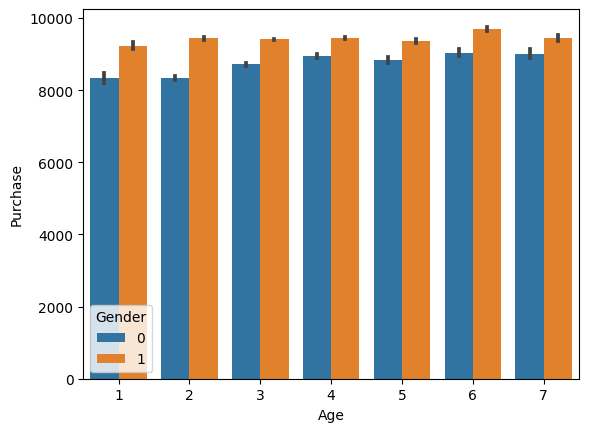

In [42]:
#Visualization age vs purchase
sns.barplot('Age','Purchase',hue='Gender',data=df)

In [43]:
#Observaation
#Purchasing of men is higher than female 

C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

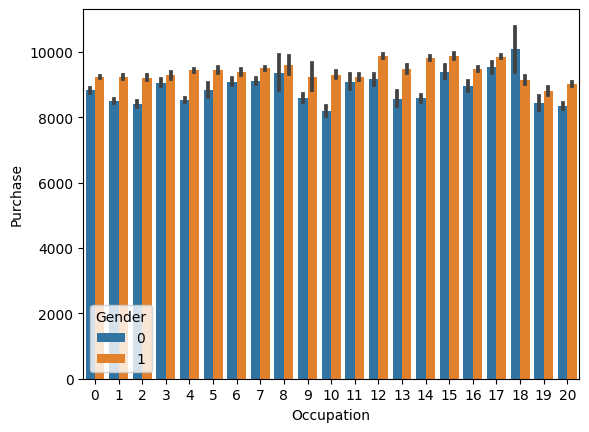

In [44]:
#Visualization Occupation vs purchase
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

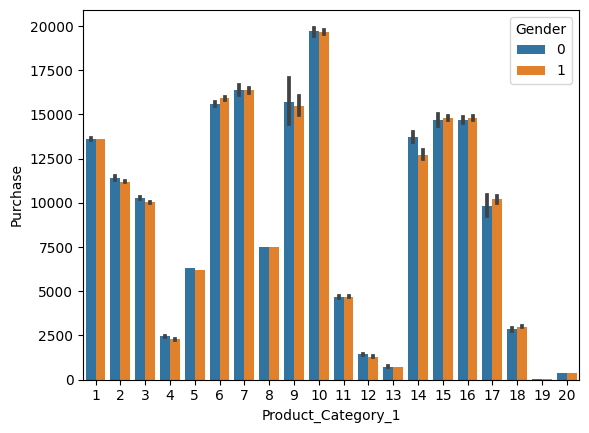

In [45]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

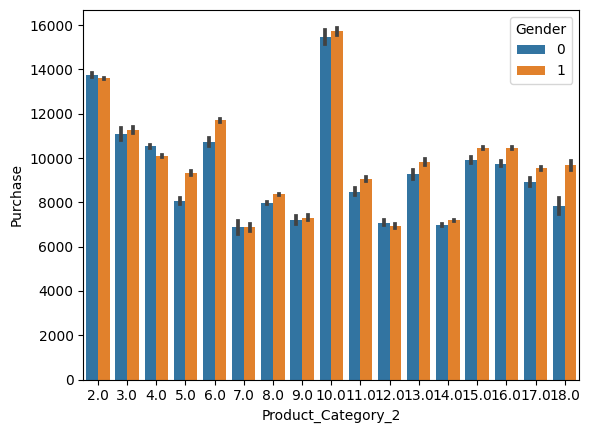

In [46]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

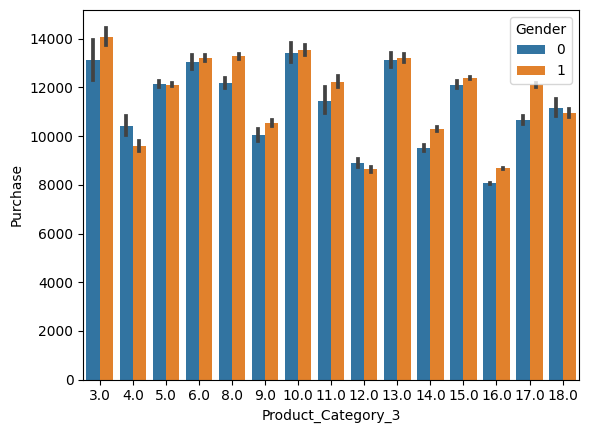

In [47]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [48]:
#Observation
# Both male and female purchases more in product category_1

In [49]:
df.head(3)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0


In [50]:

df.drop(['Product_ID'],axis=1,inplace=True)

In [51]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1


In [52]:
#importing test dataset
test=pd.read_csv('test.csv')
test_c = test.copy()
test.shape

(233599, 11)

In [53]:
test.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [54]:
test.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [55]:
test['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [56]:
test['Gender'].replace(['M','F'],[1,0],inplace=True)
test['Gender'] = test['Gender'].astype(int)

In [57]:
test['Age']=test['Age'].map({'0-17':1,'18-25':2,"26-35":3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
test['Age'] = test['Age'].astype(int)

In [58]:
test_city=pd.get_dummies(test['City_Category'],drop_first=True)
test=pd.concat([test,test_city],axis=1)

In [59]:
test.drop(['City_Category'],axis=1,inplace=True)

In [60]:
test['Stay_In_Current_City_Years'].replace('4+','4',inplace=True)
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].astype(int)
test['Product_Category_2'].fillna(test['Product_Category_2'].mean(),inplace=True)
test['Product_Category_3'].fillna(test['Product_Category_3'].mean(),inplace=True)

In [61]:
test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1,5,7,2,1,1,11.0,12.669454,1,0
1,1,3,17,0,0,3,5.0,12.669454,0,1
2,0,4,1,4,1,5,14.0,12.669454,1,0
3,0,4,1,4,1,4,9.0,12.669454,1,0
4,0,3,1,1,0,4,5.0,12.000000,0,1


In [62]:
#Feature Scaling
df['Purchase'].isnull().sum()

0

In [63]:
~df['Purchase'].isnull().sum()

-1

In [66]:
x=df.drop(['Purchase'],axis=1)
x.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [68]:
y=df['Purchase']
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [69]:
x.shape

(550068, 10)

In [70]:
y.shape

(550068,)

In [71]:
#Model building
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [72]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split ( x , y , test_size = 0.33 , random_state = 42 )

In [73]:
pipeline = Pipeline(steps=[
    ('scaling',StandardScaler()),
    ('model',RandomForestRegressor(n_estimators = 100, random_state = 0))
])

In [74]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', RandomForestRegressor(random_state=0))])

In [75]:
pred = pipeline.predict(X_test)
pred

array([14006.38344444, 14784.99382783,  6689.08869661, ...,
       11863.65591146, 13041.17363577, 16491.45889398])

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [77]:
pipeline['scaling'].inverse_transform(X_train_scaled)

array([[ 1.,  2., 14., ..., 16.,  1.,  0.],
       [ 1.,  6.,  0., ..., 16.,  0.,  0.],
       [ 1.,  4., 17., ..., 12.,  0.,  1.],
       ...,
       [ 0.,  2.,  1., ..., 16.,  1.,  0.],
       [ 0.,  2.,  4., ..., 16.,  1.,  0.],
       [ 0.,  2.,  2., ..., 16.,  0.,  0.]])

In [78]:
test_scaled = pipeline['scaling'].transform(test)

In [79]:
predictions = pipeline.predict(test_scaled)
predictions

C:\Users\win7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([13728.43833333, 16449.42940476, 13335.99816667, ...,
       11789.47883333, 12433.90333333, 13335.99816667])

In [85]:
df_final = pd.concat([test_c['User_ID'],test_c['Product_ID'],pd.DataFrame(predictions)],axis=1)

In [91]:
df_final.columns = ['User_ID','Product_ID','Purchase']
df_final['Purchase'] = df_final['Purchase'].round(2)
df_final.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,13728.44
1,1000009,P00113442,16449.43
2,1000010,P00288442,13336.00
3,1000010,P00145342,13336.00
4,1000011,P00053842,14550.46


In [92]:
df_final.to_csv('sample.csv',header=True,index=False)

# END OF THE CODE